# Tarea Semanal 4

Yanina Corsaro

1- Código del ADC creado en la TS3:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sen import mi_funcion_sen
import scipy.signal as sig
from scipy.fftpack import fft, fftfreq

mpl.rcParams['figure.figsize'] = (15,7) 

def ADC(sr, Vf, bits):  
    
    #calculamos paso de cuantización
    q = Vf/2**bits
    #cuantizamos la señal sr y normalizamos para que quede comprendida entre -Vf y +Vf
    sq= (np.round(sr/q))*q
    e = sq-sr

    return sq, e

2- Creamos una senoidal contaminada con un nivel predeterminado de ruido. Defino función para analizar y graficar.

In [8]:
def analizar(kn, B, fs, f0):
    # parámetros de la función seno

    N  = 1000 # muestras
    
    p0 = 0
    
    V = 1  # Volt
    Vf = 2  # Volt
  
    q = Vf/2**B

    ts = 1/fs # tiempo de muestreo
    df = fs/N # resolución espectral


    # función seno
    tt, xx= mi_funcion_sen( vmax=V , dc=0 , ff=f0 , ph=p0, nn=N , fs=fs )

    # ruido

    Pn = (q**2/12) * kn 
    d = np.sqrt(Pn)
    n = np.random.normal(0,d, size=N)

    tt = np.linspace( start= 0, stop= (N-1)/fs ,num = N)

    # función seno + ruido
    sr = xx+n

    s, e = ADC(sr=sr,Vf=Vf,bits=B)


    plt.figure(1)
    plt.plot(tt, s, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
    plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
    plt.plot(tt, xx, color='orange', ls='dotted', label='$ s $ (analog)')

    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
    plt.xlabel('tiempo [segundos]')
    plt.ylabel('Amplitud [V]')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    plt.show()

    # calculamos la fft
    ff = np.linspace(0, (N-1), N)*df
    ff_os = ff
    ft_S = fft(s,N)
    ft_As = fft(xx,N)
    ft_SR = fft(sr,N)
    ft_Nn = fft(n,N)
    ft_Nq = fft(e,N)

    plt.figure(2)
    bfrec = ff <= fs/2

    nNn_mean = np.mean(np.abs(ft_Nn)**2)
    Nnq_mean = np.mean(np.abs(ft_Nq)**2)


    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_S[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
    plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
    plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    # suponiendo valores negativos de potencia ruido en dB
    #plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))

    plt.figure(3)
    bins = 10
    plt.hist(e, bins=bins)
    plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
    plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

 

3- Generamos el resultado y graficamos. B = 4 bits, kn=1.

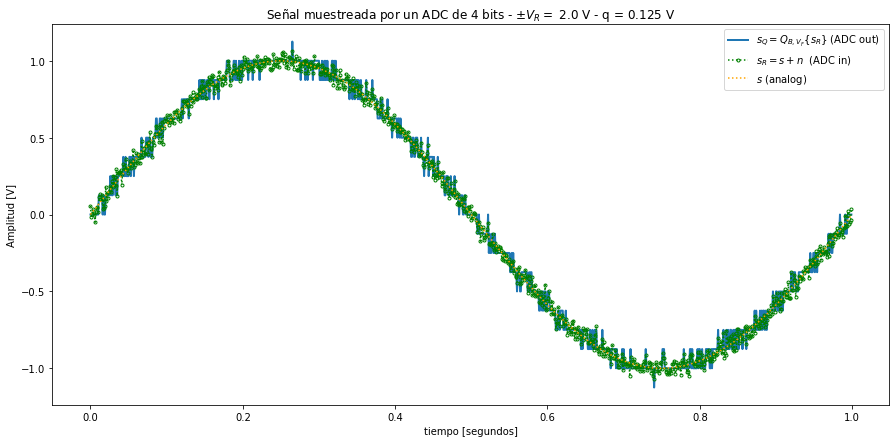

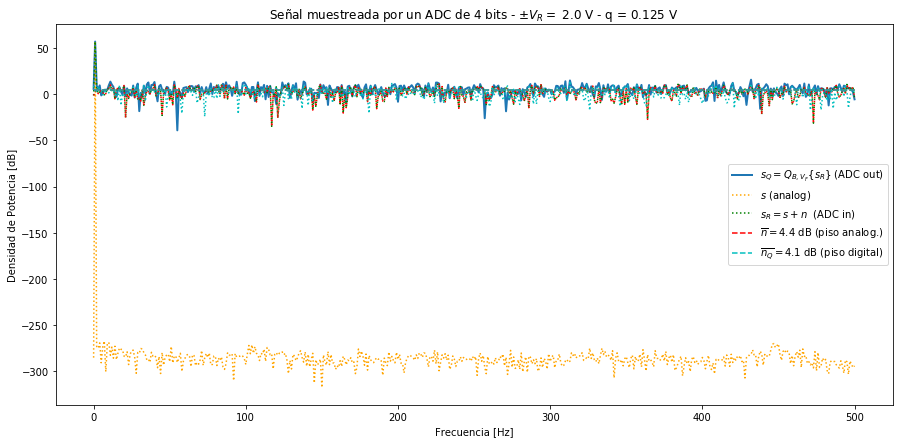

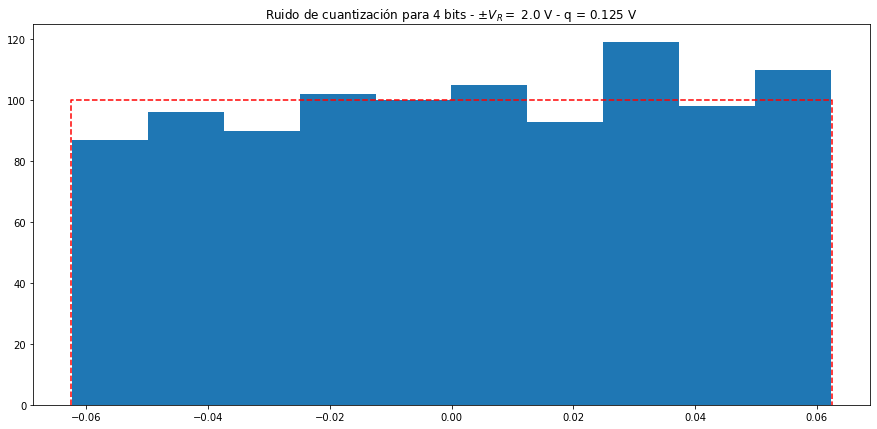

In [9]:
analizar(1, 4, 1000, 1)

4-  Analizar para una de las siguientes configuraciones B = ̣{4, 8 y 16} bits, kn={1/10,1,10}. 

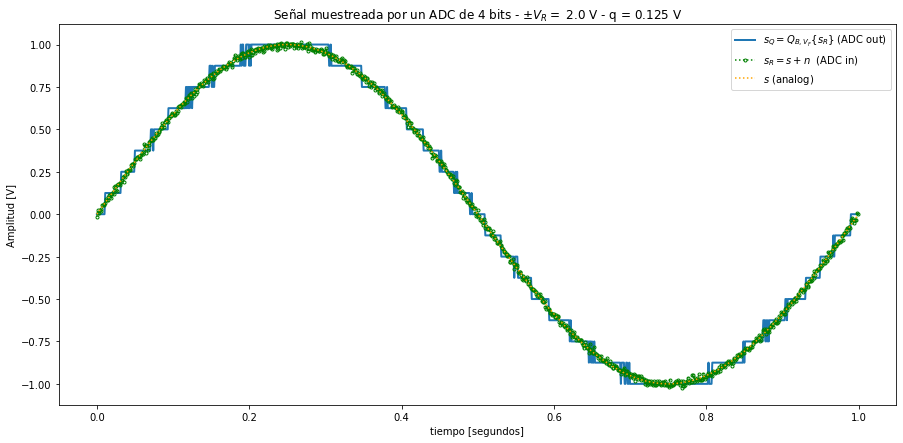

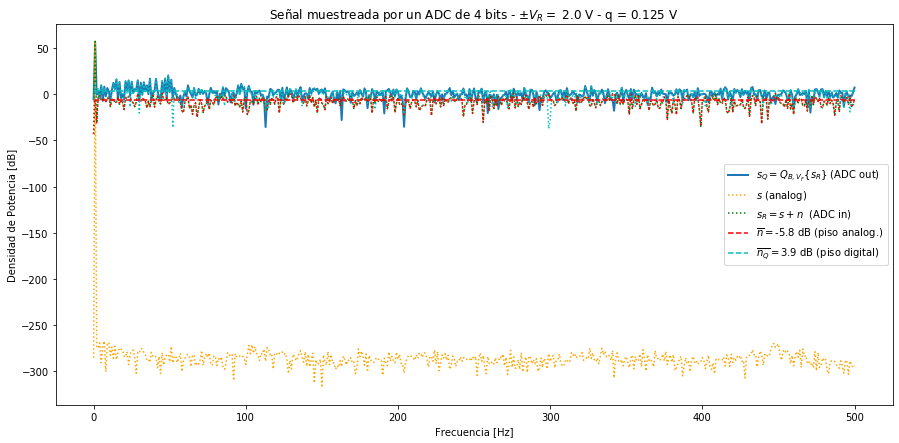

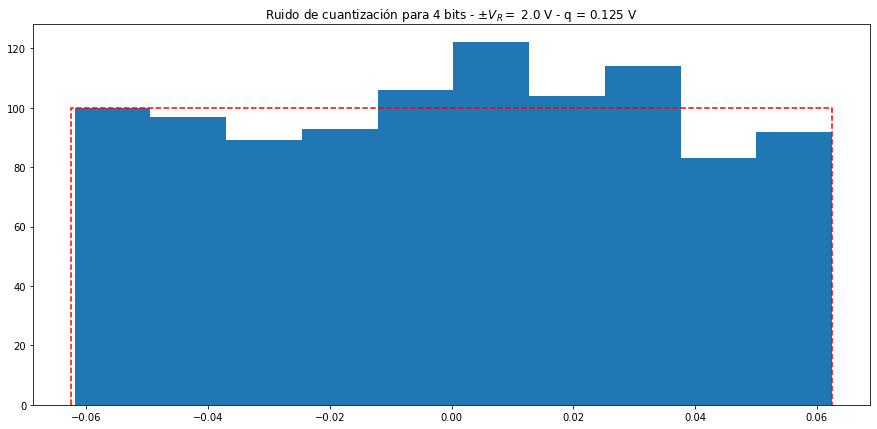

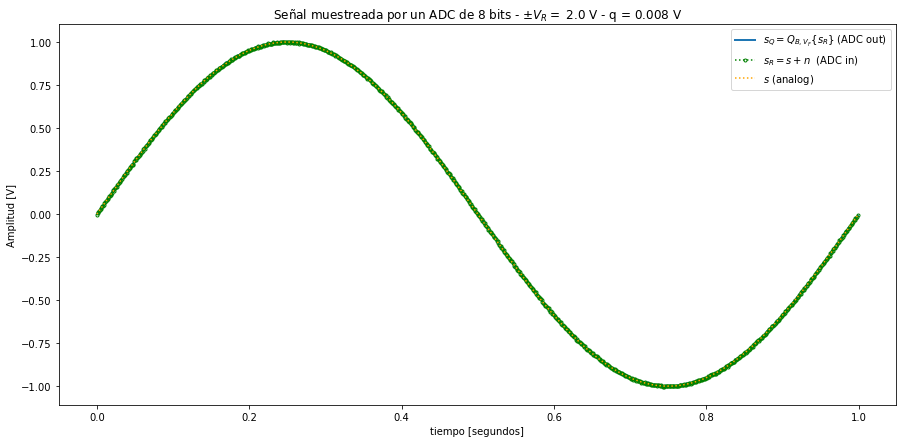

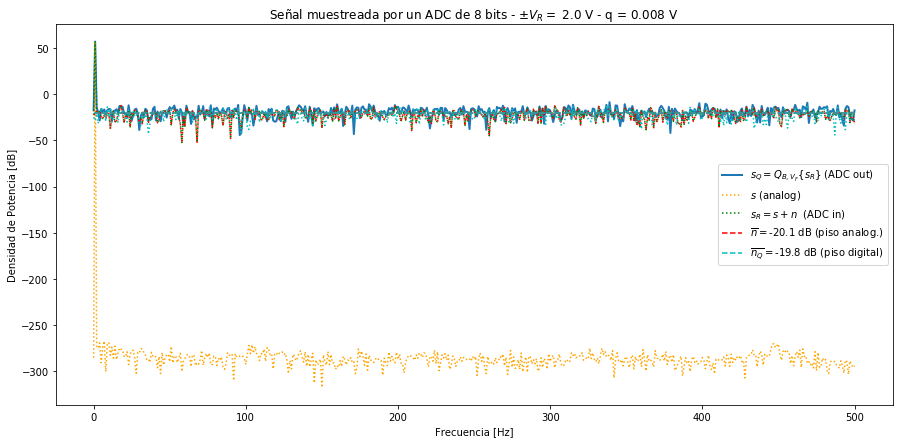

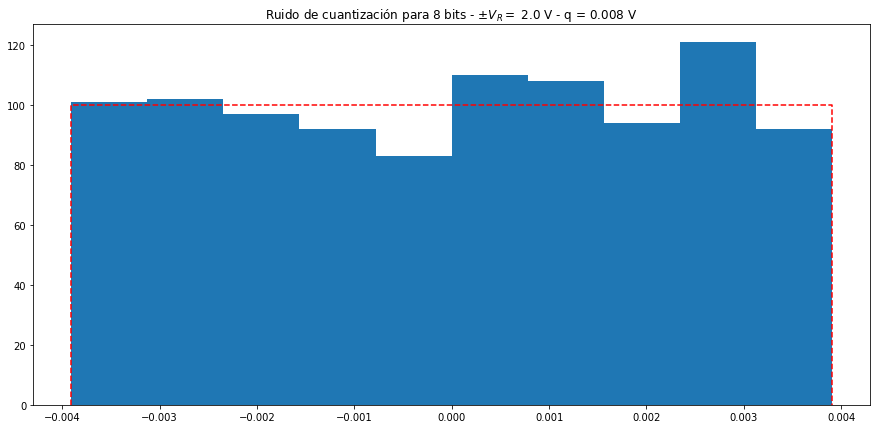

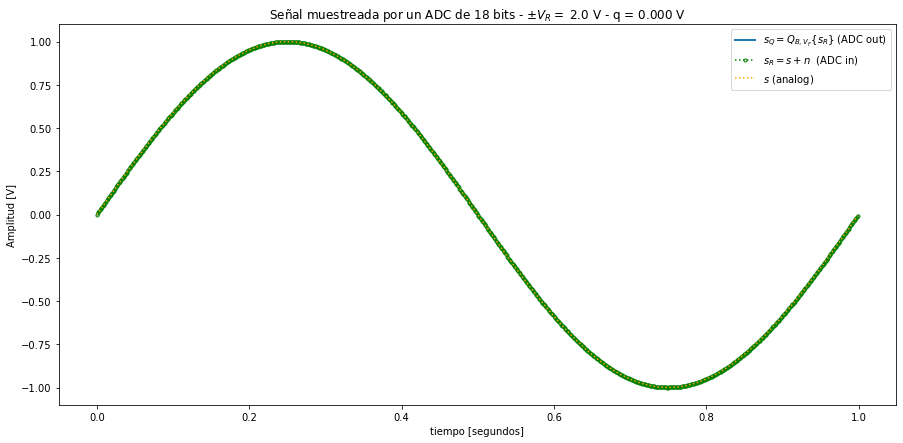

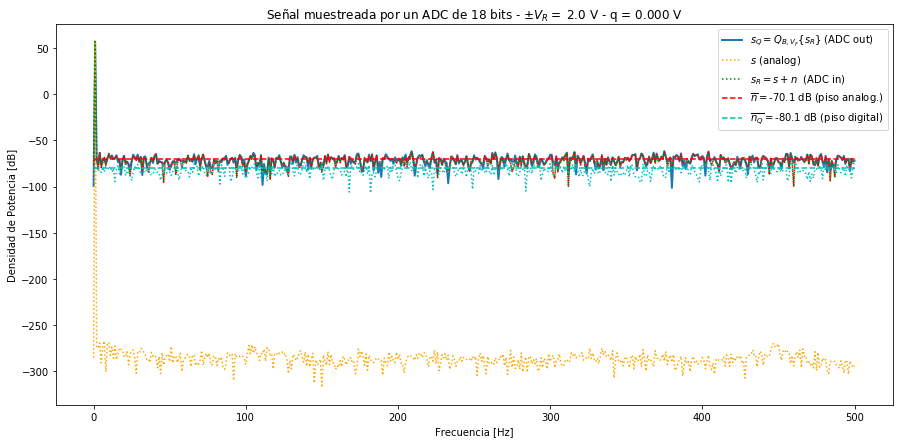

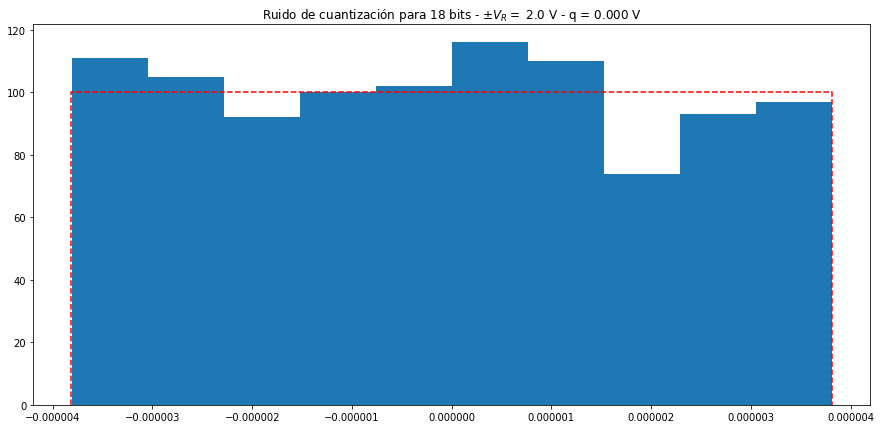

In [11]:
bits = [4,8,18]
fs=1000
kn=[1/10,1,10]
i = 0
for B in bits:
    analizar(kn[i], B, fs, 1)
    i = i+1

5- Simular el efecto del aliasing junto con el muestreo.

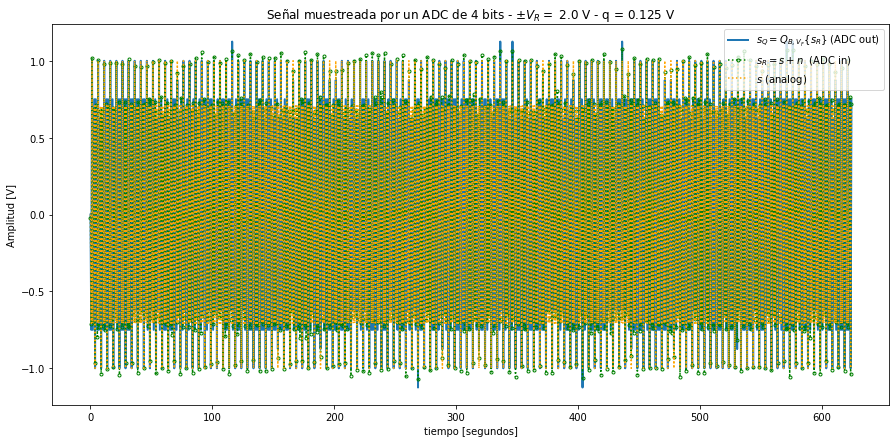

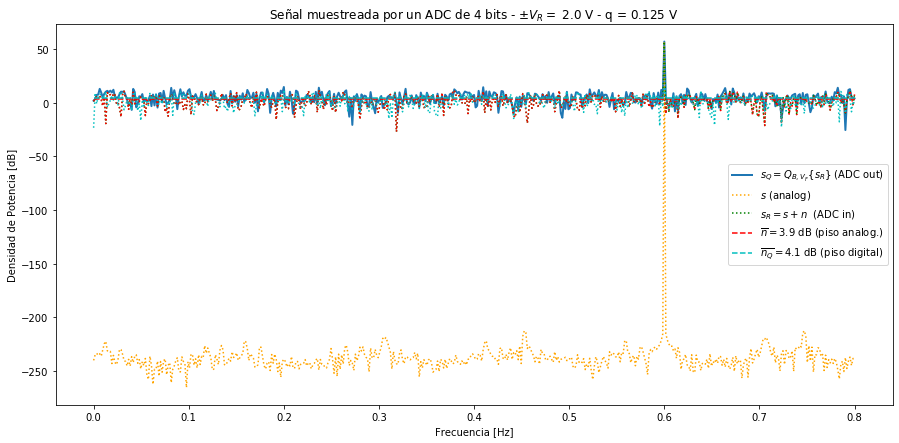

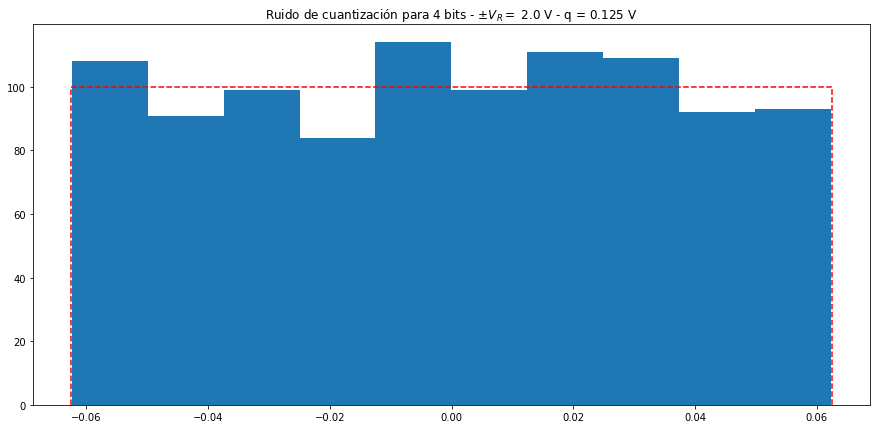

In [10]:
alias = 0.8 # porcentaje para hacer fs < 2.f0
f0 = 1
fs = 2*f0*alias

B = 4
kn = 1

analizar(kn, B, fs, f0)